In [93]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

# Analising the data

In [94]:
df = pd.read_csv('death.csv')
df.head

<bound method NDFrame.head of         Location    Region           Subregion  Rate  Count  Year
0    Afghanistan      Asia       Southern Asia   6.7   2474  2018
1        Albania    Europe     Southern Europe   2.1     61  2020
2        Algeria    Africa     Northern Africa   1.3    580  2020
3        Andorra    Europe     Southern Europe   2.6      2  2020
4         Angola    Africa       Middle Africa   4.8   1217  2012
..           ...       ...                 ...   ...    ...   ...
190    Venezuela  Americas       South America  36.7  10598  2018
191      Vietnam      Asia  South-Eastern Asia   1.5   1358  2011
192        Yemen      Asia        Western Asia   6.8   1703  2013
193       Zambia    Africa      Eastern Africa   5.4    853  2015
194     Zimbabwe    Africa      Eastern Africa   7.5    981  2012

[195 rows x 6 columns]>

In [95]:
df.shape

(195, 6)

In [96]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [97]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [98]:
df['Rate'] = df['Rate'].astype(int)
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int64
Year          int64
dtype: object

In [99]:
my_list = ['Count','Rate','Year']
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)

Count
Rate
Year


In [100]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [101]:
df['Region'].replace('Americas','N/S America',inplace=True)

C:\Users\Paulo Calueto\AppData\Local\Temp\ipykernel_7016\1525685670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].replace('Americas','N/S America',inplace=True)


In [102]:
df1 = df.sort_values('Count',ascending=False).reset_index(drop=True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,N/S America,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,N/S America,Central America,28,36579,2020
4,United States,N/S America,Northern America,6,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0,0,2015
191,Channel Islands,Europe,Northern Europe,0,0,2010
192,Saint Helena,Africa,Western Africa,0,0,2009
193,San Marino,Europe,Southern Europe,0,0,2011


In [103]:
df1 = df[['Location','Count']].sort_values(by='Count',ascending=False).head(5)
df1['Perc'] = (df1['Count'] * 100 / df1['Count'].sum()).round(2)
df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


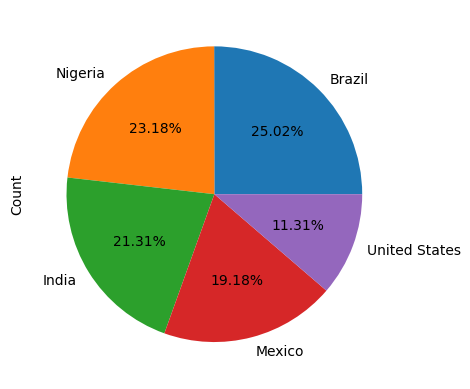

In [104]:
df1.plot(x='Location',y='Count', kind='pie', labels = df1.Location, autopct='%1.2f%%')
plt.legend().set_visible(False)

In [105]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending=False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int32

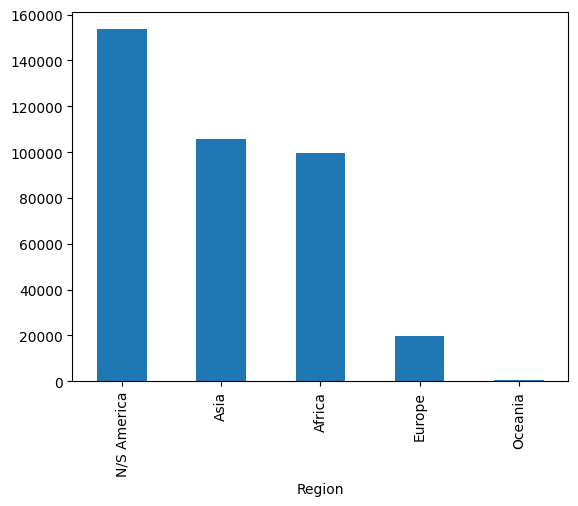

In [106]:
df2.plot(kind='bar')
plt.show()

In [107]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [108]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [109]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [110]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

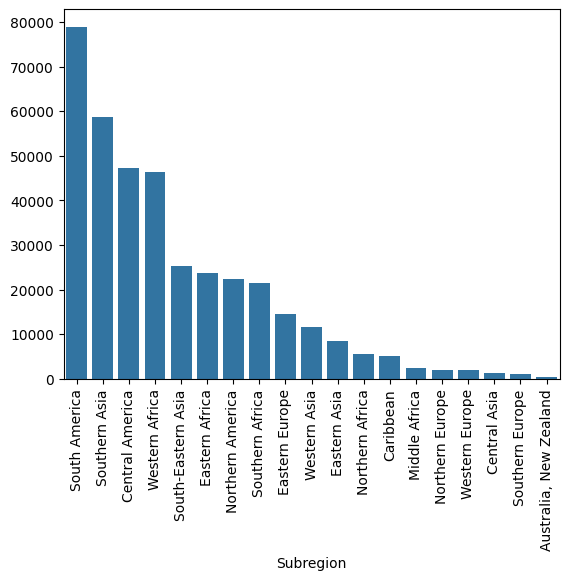

In [111]:
sns.barplot(x = df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
xlabel = None

In [112]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [113]:
df[df['Region'].isin(['Asia','Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [114]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]
df4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [115]:
df4 = df4[df4['Year'] > 2016][['Region','Year','Count']]
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [116]:
df4 = df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int32

In [117]:
df_unstaked = df4.unstack(level=0)
df_unstaked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [120]:
df_unstaked.index = df_unstaked.index.astype(int).astype(str)

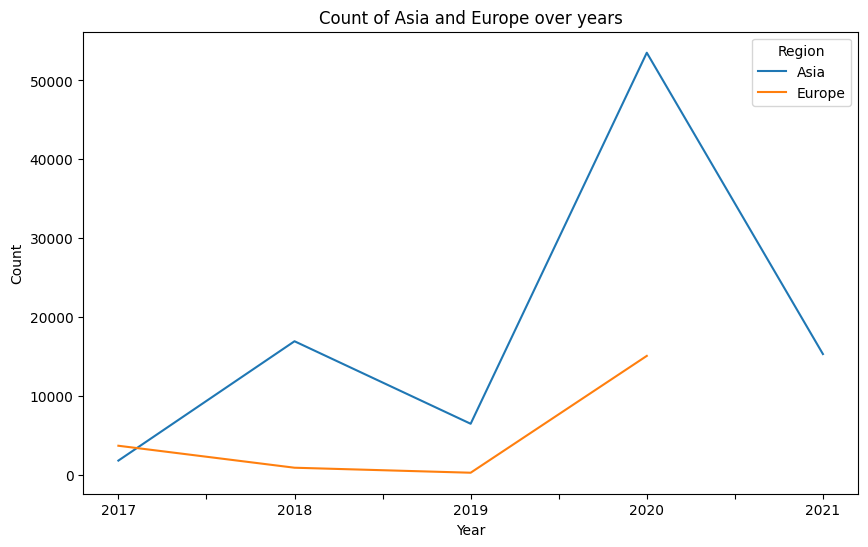

In [123]:
df_unstaked.plot(kind='line',figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over years')
plt.show()

In [124]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [126]:
df5 = df.groupby('Year')['Rate'].sum().sort_values(ascending=False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

<Axes: xlabel='Year'>

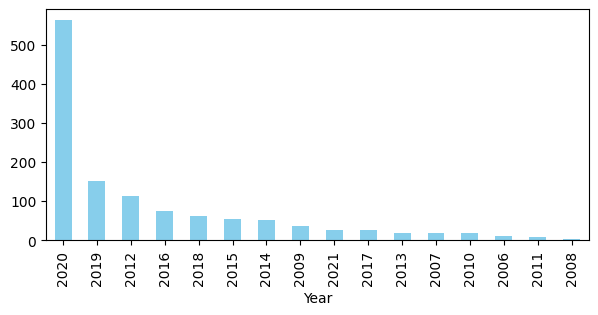

In [128]:
df5.plot(kind='bar', figsize=(7,3),color='skyblue')

In [129]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [134]:
df6 = df[['Year','Region','Count']]
df6 = df6.groupby(['Year','Region']).sum().sort_values(by='Year',ascending=False).head(40)
df6


Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2

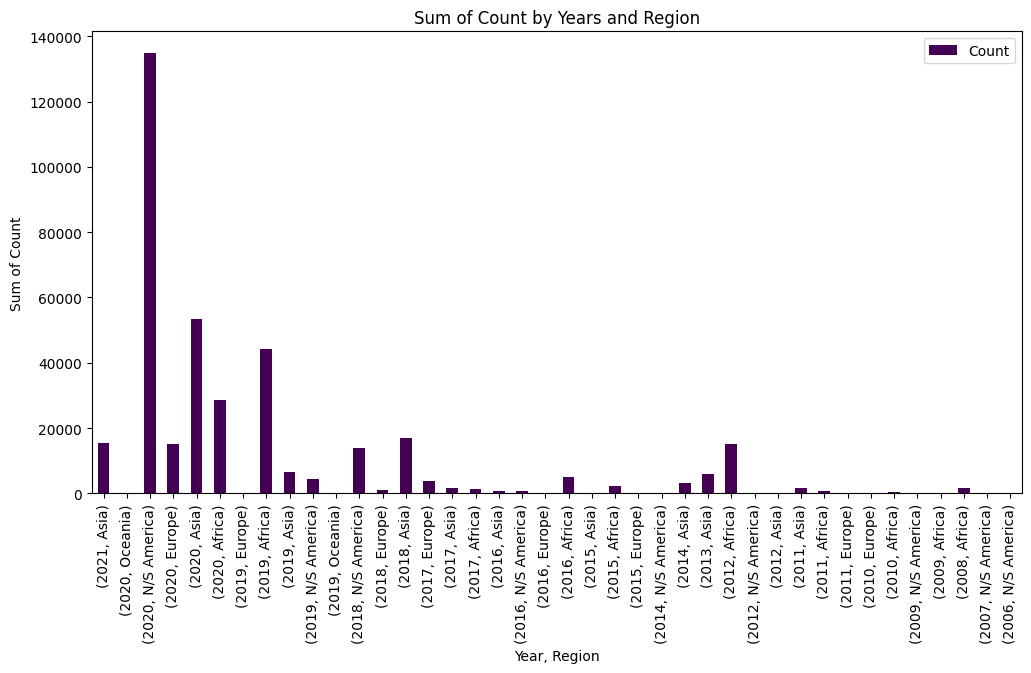

In [138]:
df6.plot(kind='bar',figsize=(12,6), colormap='viridis')
plt.xlabel('Year, Region')
plt.ylabel('Sum of Count')
plt.title('Sum of Count by Years and Region')
plt.show()

In [141]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending=False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [142]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [143]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [151]:
data = {
    'Category': df7.index,
    'Value': df7.values,
    'Info': df7.index
}
df = pd.DataFrame(data)
df

,Category,Value,Info
0,Southern Asia,6514.56,Southern Asia
1,South America,6067.08,South America
2,Central America,5921.38,Central America
3,Northern America,4463.40,Northern America
4,Southern Africa,4295.80,Southern Africa
5,Western Africa,4210.73,Western Africa
6,South-Eastern Asia,2531.40,South-Eastern Asia
7,Eastern Africa,1577.93,Eastern Africa
8,Eastern Europe,1460.40,Eastern Europe
9,Eastern Asia,1223.29,Eastern Asia


In [158]:
fig = px.treemap(df,path=['Category'],values='Value', title='Treemap')
fig.update_traces(hovertemplate = 'Category: %{label}<br>Value:%{values}')
fig.show()